# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\johng\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!

Bad key text.latex.preview in file C:\Users\johng\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.0/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file C:\Users\johng\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.0/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file C:\Users

In [2]:
# Read your api key environment variable
load_dotenv()
news_api_key = os.getenv('NEWS_API')

In [3]:
# Create a newsapi client
from newsapi.newsapi_client import NewsApiClient
newsapi = NewsApiClient(api_key=news_api_key)

In [4]:
# Fetch the Bitcoin news articles
btc_headlines = newsapi.get_everything(q="bitcoin", language="en", sort_by="relevancy")

In [5]:
# Fetch the Ethereum news articles
eth_headlines = newsapi.get_everything(q="ethereum", language="en", sort_by="relevancy")

In [49]:
# Create the Bitcoin sentiment scores DataFrame
sid = SentimentIntensityAnalyzer()

btc_sentiments = []

for article in btc_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
btc_df = pd.DataFrame(btc_sentiments)
btc_df.head()

,text,date,compound,positive,negative,neutral
0,"When Russia invaded Ukraine, Niki Proshin was ...",2022-03-17,0.0000,0.000,0.000,1.000
1,"""Bitcoin was seen by many of its libertarian-l...",2022-03-12,-0.7713,0.000,0.169,0.831
2,March 22 (Reuters) - Bitcoin just isn't anonym...,2022-03-22,0.6369,0.171,0.000,0.829
3,Feb 22 (Reuters) - Bitcoin miners are feeling ...,2022-02-22,-0.1779,0.046,0.067,0.887
4,March 1 (Reuters) - Bitcoin has leapt since Ru...,2022-03-01,0.0000,0.000,0.000,1.000


In [50]:
# Create the Ethereum sentiment scores DataFrame
eth_sentiments = []

for article in eth_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
eth_df = pd.DataFrame(eth_sentiments)
eth_df.head()

,text,date,compound,positive,negative,neutral
0,"In February, shit hit the fan in the usual way...",2022-03-01,-0.3182,0.059,0.093,0.848
1,Coinbase reported that the share of trading vo...,2022-02-25,0.6705,0.188,0.000,0.812
2,Illustration by James Bareham / The Verge\r\n\...,2022-02-26,-0.4588,0.000,0.083,0.917
3,His name is Vitalik Buterin and after dedicati...,2022-03-22,0.0000,0.000,0.000,1.000
4,"It seems that in 2022, you cant escape from th...",2022-03-03,-0.1326,0.000,0.044,0.956


In [51]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.00000,20.000000
mean,0.060960,0.058750,0.03960,0.901600
std,0.419188,0.053708,0.06121,0.073953
min,-0.771300,0.000000,0.00000,0.739000
25%,-0.184000,0.000000,0.00000,0.852500
50%,0.000000,0.061500,0.00000,0.902500
75%,0.430825,0.092750,0.05650,0.952500
max,0.636900,0.171000,0.18700,1.000000


In [52]:
# Describe the Ethereum Sentiment
eth_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.233365,0.085400,0.024600,0.889950
std,0.428281,0.092623,0.037614,0.104349
min,-0.526700,0.000000,0.000000,0.682000
25%,0.000000,0.000000,0.000000,0.841000
50%,0.200950,0.068500,0.000000,0.910500
75%,0.528675,0.141500,0.048500,1.000000
max,0.867600,0.270000,0.115000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum has the highest mean positive score

Q: Which coin had the highest compound score?

A: Ethereum has the highest compound score

Q. Which coin had the highest positive score?

A: Ethereum has the highest positive max score

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [53]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [54]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
nltk.download('stopwords')
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
sw

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\johng\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [55]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub(' ', text)
   
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase
    # Remove the stop words
    tokens = [word.lower() for word in lem if word.lower() not in sw]
    
    
    
    
    return tokens

In [56]:
# Create a new tokens column for Bitcoin
btc_token = tokenizer(str(btc_df['text']))


In [57]:
# Create a new tokens column for Ethereum
eth_token = tokenizer(str(eth_df['text']))
eth_token

['february',
 'shit',
 'hit',
 'fan',
 'usual',
 'way',
 'coinbase',
 'reported',
 'share',
 'trading',
 'vo',
 'illustration',
 'james',
 'bareham',
 'verge',
 'r',
 'n',
 'name',
 'vitalik',
 'buterin',
 'dedicati',
 'seems',
 'cant',
 'escape',
 'th',
 'sound',
 'good',
 'true',
 'youre',
 'wr',
 'non',
 'fungible',
 'token',
 'risen',
 'interest',
 'cryptocurrency',
 'boom',
 'past',
 'year',
 'version',
 'article',
 'wa',
 'published',
 'tim',
 'joe',
 'biden',
 'dipping',
 'toe',
 'crypto',
 'version',
 'article',
 'wa',
 'published',
 'tim',
 'cryptocurrency',
 'boom',
 'past',
 'year',
 'cryptocurrency',
 'boom',
 'past',
 'year',
 'new',
 'york',
 'march',
 'reuters',
 'cryptocurrency',
 'blockchain',
 'technology',
 'reach',
 'true',
 'mass',
 'news',
 'blockchain',
 'specialist',
 'consensys',
 'scoo',
 'kitco',
 'news',
 'escalating',
 'russia',
 'ukraine',
 'cri',
 'day',
 'leading',
 'march',
 'pur',
 'personal',
 'finance',
 'insider',
 'writes',
 'product',
 'travel',
 

---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [58]:
from collections import Counter
from nltk import ngrams

In [59]:
# Generate the Bitcoin N-grams where N=2
n= 2 
btc_ngrams = ngrams(str(btc_df['text']).split(), n)
btc_ngrams

for grams in btc_ngrams:
    print(grams)

('0', 'When')
('When', 'Russia')
('Russia', 'invaded')
('invaded', 'Ukraine,')
('Ukraine,', 'Niki')
('Niki', 'Proshin')
('Proshin', 'was')
('was', '...')
('...', '1')
('1', '"Bitcoin')
('"Bitcoin', 'was')
('was', 'seen')
('seen', 'by')
('by', 'many')
('many', 'of')
('of', 'its')
('its', 'libertarian-l...')
('libertarian-l...', '2')
('2', 'March')
('March', '22')
('22', '(Reuters)')
('(Reuters)', '-')
('-', 'Bitcoin')
('Bitcoin', 'just')
('just', "isn't")
("isn't", 'anonym...')
('anonym...', '3')
('3', 'Feb')
('Feb', '22')
('22', '(Reuters)')
('(Reuters)', '-')
('-', 'Bitcoin')
('Bitcoin', 'miners')
('miners', 'are')
('are', 'feeling')
('feeling', '...')
('...', '4')
('4', 'March')
('March', '1')
('1', '(Reuters)')
('(Reuters)', '-')
('-', 'Bitcoin')
('Bitcoin', 'has')
('has', 'leapt')
('leapt', 'since')
('since', 'Ru...')
('Ru...', '5')
('5', 'Whose')
('Whose', 'side')
('side', 'is')
('is', 'cryptocurrency')
('cryptocurrency', 'on?')
('on?', 'If')
('If', 'you')
('you', 'had')
('had', '

In [60]:
# Generate the Ethereum N-grams where N=2
eth_ngrams = ngrams(str(eth_df['text']).split(), n)
for grams in eth_ngrams:
    print(grams)

('0', 'In')
('In', 'February,')
('February,', 'shit')
('shit', 'hit')
('hit', 'the')
('the', 'fan')
('fan', 'in')
('in', 'the')
('the', 'usual')
('usual', 'way...')
('way...', '1')
('1', 'Coinbase')
('Coinbase', 'reported')
('reported', 'that')
('that', 'the')
('the', 'share')
('share', 'of')
('of', 'trading')
('trading', 'vo...')
('vo...', '2')
('2', 'Illustration')
('Illustration', 'by')
('by', 'James')
('James', 'Bareham')
('Bareham', '/')
('/', 'The')
('The', 'Verge\\r\\n\\...')
('Verge\\r\\n\\...', '3')
('3', 'His')
('His', 'name')
('name', 'is')
('is', 'Vitalik')
('Vitalik', 'Buterin')
('Buterin', 'and')
('and', 'after')
('after', 'dedicati...')
('dedicati...', '4')
('4', 'It')
('It', 'seems')
('seems', 'that')
('that', 'in')
('in', '2022,')
('2022,', 'you')
('you', 'cant')
('cant', 'escape')
('escape', 'from')
('from', 'th...')
('th...', '5')
('5', 'If')
('If', 'it')
('it', 'sounds')
('sounds', 'too')
('too', 'good')
('good', 'to')
('to', 'be')
('be', 'true,')
('true,', 'youre')

In [61]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [62]:
# Use token_count to get the top 10 words for Bitcoin
top10_btc = token_count(btc_token)
top10_btc

[('reuters', 8),
 ('bitcoin', 7),
 ('march', 7),
 ('r', 4),
 ('li', 4),
 ('russia', 2),
 ('wa', 2),
 ('feb', 2),
 ('getty', 2),
 ('week', 2)]

In [63]:
# Use token_count to get the top 10 words for Ethereum
top10_eth = token_count(eth_token)
top10_eth

[('cryptocurrency', 4),
 ('boom', 3),
 ('past', 3),
 ('year', 3),
 ('name', 2),
 ('true', 2),
 ('version', 2),
 ('article', 2),
 ('wa', 2),
 ('published', 2)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [64]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

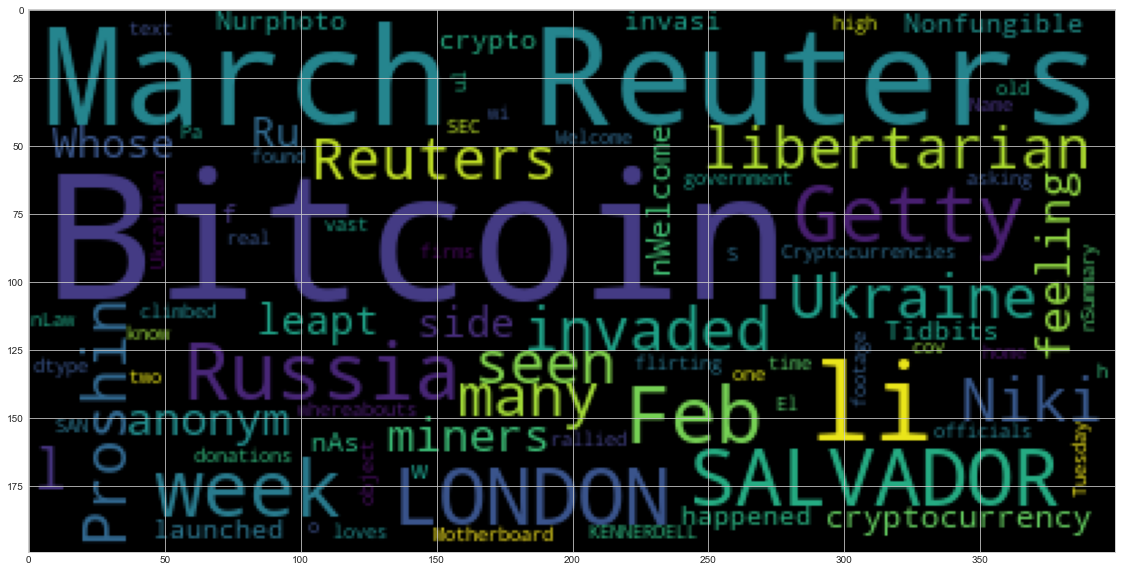

In [67]:
# Generate the Bitcoin word cloud
wc = WordCloud().generate(str(btc_df['text']))
plt.imshow(wc)

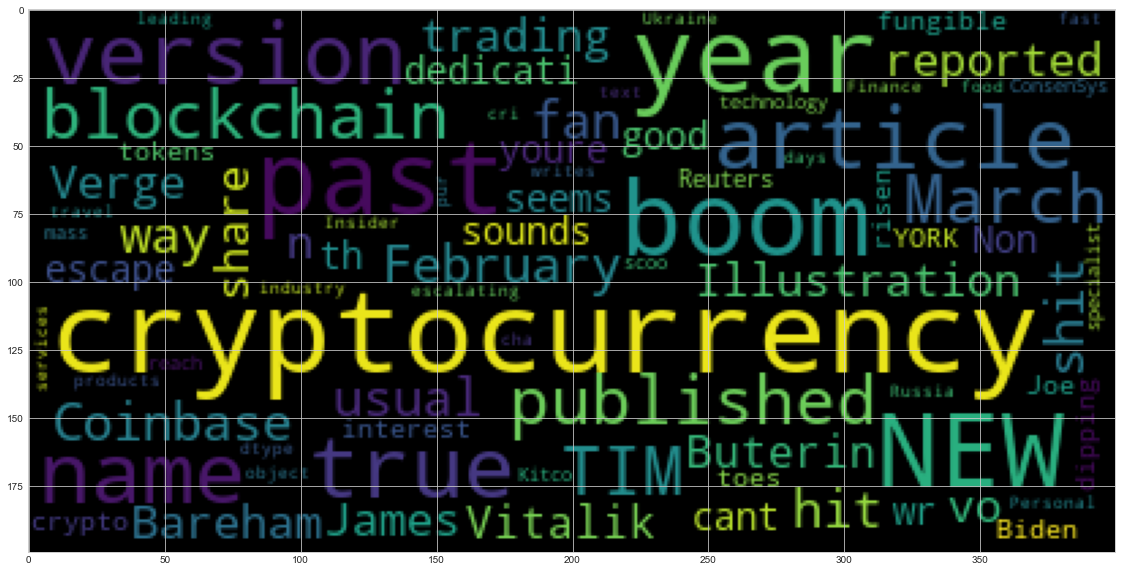

In [68]:
# Generate the Ethereum word cloud
wc = WordCloud().generate(str(eth_df['text']))
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [69]:
import spacy
from spacy import displacy

In [71]:
# Download the language model for SpaC 
!python -m spacy download en_core_web_sm

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [72]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [77]:
# Concatenate all of the Bitcoin text together
btc_text = []
for text in btc_df['text']:
    btc_text.append(text)

In [79]:
# Run the NER processor on all of the text
btc_ner = nlp(str(btc_text))

# Add a title to the document
btc_ner.user_data["title"] = 'Bitcoin NER'

In [84]:
# Render the visualization

displacy.render(btc_ner, style='ent')

In [83]:
# List all Entities
btc_ner.ents


(Russia,
 Ukraine,
 Niki Proshin,
 a year,
 YouTube,
 TikTok,
 Instagram,
 Russian,
 the New York Times,
 March 22,
 Reuters,
 Feb 22,
 Reuters,
 2021,
 thousands,
 March 1,
 Reuters,
 Russia,
 Ukraine,
 Satoshi Nakamoto,
 2008,
 this week,
 Russia,
 Ukrainians,
 Russian,
 this week,
 Nonfungible Tidbits,
 weekly,
 this week,
 Russia,
 last Thursday,
 Ukranian,
 Mexico City,
 Telegr,
 LONDON,
 March 4,
 Reuters,
 Russia,
 Ukraine,
 Russia,
 'March 15,
 Reuters,
 U.S.,
 Joe Biden,
 KENNERDELL,
 Pa.,
 March 21,
 Reuters,
 LONDON,
 March 22,
 Reuters,
 Tuesday,
 almost three weeks,
 Russia,
 Ukraine,
 Reuters,
 Ukrainian,
 Tom Lee,
 SAN SALVADOR,
 March 11,
 Reuters,
 El Salvador,
 between March 15 and 20,
 Central American,
 two-week,
 Tuesday,
 Russians,
 Ukrainians,
 Motherboard,
 one,
 first,
 Bitcoin,
 Bitcoin 2013,
 San Jose.\r\n2013,
 only 9 years,
 Bitcoin,
 SEC,
 Satish Kumbhani,
 BitConnect,
 charged\r\n last week,
 $2.4 billion,
 Ponzi)

---

### Ethereum NER

In [86]:
# Concatenate all of the Ethereum text together
eth_text = []
for text in eth_df['text']:
    eth_text.append(text)

In [90]:
# Run the NER processor on all of the text
eth_ner = nlp(str(eth_text))

# Add a title to the document
eth_ner.user_data["title"] = 'Ethereum NER'

In [92]:
# Render the visualization
displacy.render(eth_ner, style='ent')

In [94]:
# List all Entities
eth_ner.ents

(February,
 Ethereum Name Service,
 ENS,
 May 201,
 Coinbase,
 last year,
 2020,
 2021,
 James Bareham,
 More than $15 million,
 More than $15 million,
 Ukrainian,
 Russia,
 Vitalik Buterin,
 TIME,
 28-year-old,
 Russian,
 2022,
 Microsoft,
 the last year,
 Bored Ape Yacht Club,
 one,
 Ethereum,
 the past few years,
 NFTs.\xa0\r\nIn,
 NFT,
 $23 billion,
 TIME,
 weekly,
 Joe Biden,
 Wednesday,
 first,
 TIME,
 weekly,
 the past few years,
 NFTs.\xa0\r\nIn,
 NFT,
 $23 billion,
 the past few years,
 NFTs.\xa0\r\nIn,
 NFT,
 $23 billion,
 NEW YORK,
 March 21,
 Reuters,
 a second straight week,
 CoinShares,
 Monday,
 Ethereum,
 450,
 Series,
 US,
 over $7 billion,
 Kitco News,
 Russia,
 Ukraine,
 the days,
 March 11,
 Yuga Labs,
 Meebits,
 Larva Labs,
 more than a dozen,
 Ethereum,
 American Express,
 Tuesday,
 showed.\xa0\r\nOf)

---